# 常用方法、時機整理：

Supervised:<br/>
1. Classificaton : Naive Bayes(NB) Classification / SVM / Decision Trees & Random Forests <br/>
2. Regression : Linear Regression / SVM / Decision Trees & Random Forests <br/>

Unsupervised:<br/>
1. Clustering : K-Means Clustering / Gaussian Mixture Models(GMM) <br/>
2. Dimensionality reduction : Manifold Learning / Principal Component Analysis(PCA) <br/>

# iris data preprocessing

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### sns.pairplot(, hue = confounding factor)

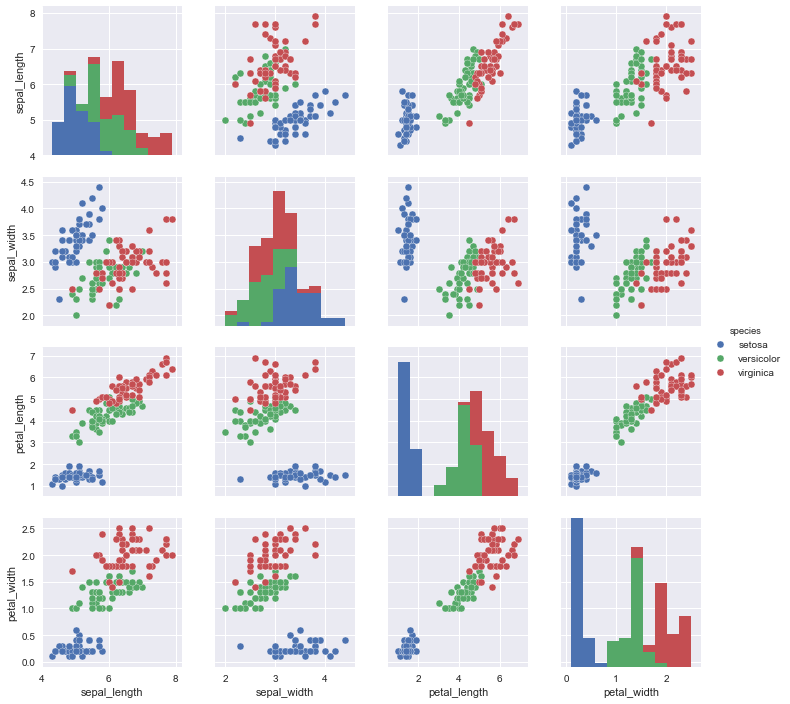

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set()
plt.figure() #調整大小
sns.pairplot(iris, hue='species')

In [38]:
X_iris = iris.drop('species', axis=1) #feature就是4個特徵長度
X_iris.shape

(150, 4)

In [61]:
y_iris = iris['species'] #label就是品種
y_iris.shape

(150,)

# Supervised learning

## linear regression

### 創造數組

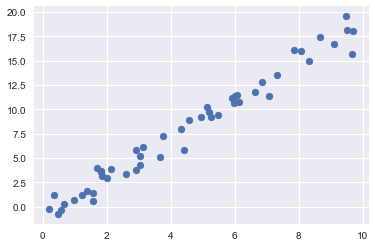

In [41]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

x = 10 * np.random.rand(50)
y = 2 * x - 1 + np.random.randn(50)
plt.scatter(x, y)

### 引入模型 model = 方法()

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression(fit_intercept=True) #n_jobs=1 表示一次方
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

整理好數據格式（應該早就要整理了）

In [46]:
X = x.reshape(-1,1) #row軸不管，但是column一定要是1
#效果同 X = x[:, np.newaxis]
X.shape

(50, 1)

### 訓練模型 model.fit(train_feature, train_label)

In [47]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
model.coef_

array([ 1.9776566])

In [49]:
model.intercept_

-0.90331072553111635

### 使用模型做預測 model.predict(X_test)

In [52]:
xfit = np.linspace(-1, 11)

Xfit = xfit.reshape(-1,1)
yfit = model.predict(Xfit)

預測結果視覺化

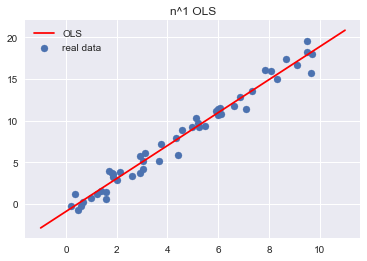

In [58]:
plt.scatter(X, y, label='real data')
plt.plot(Xfit, yfit, 'r',label='OLS')
plt.title('n^1 OLS')
plt.legend(loc='best')

## Iris classification: GaussianNB

### 區分train/validation :  train_test_split(X, y)

In [62]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1) #隨機分派數組到train, test

In [63]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

### 作答看準確率 accuracy_score(ytest, y_model)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)  #應該是supervised classification learning才可以測驗accuracy

0.97368421052631582

In [70]:
y_model #取得答案卷

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'],
      dtype='<U10')

# Unsupervised learning

## Iris dimensionality: Principal Component Analysis(PCA)

In [65]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
                                       #    把feature變成PCA1跟PCA2，好2D作圖
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [73]:
X_2D[0:5] #n_components=2 --> 分出PCA1跟2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### 類似回歸作圖 sns.lmplot() :  combines regplot() and FacetGrid

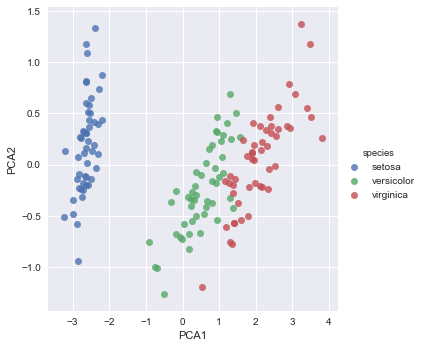

In [66]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## Iris clustering: GaussianMixture

In [68]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
                        covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                    # 4. Determine cluster labels

In [74]:
y_gmm #n_components=3 --> 分成3個cluster類別

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

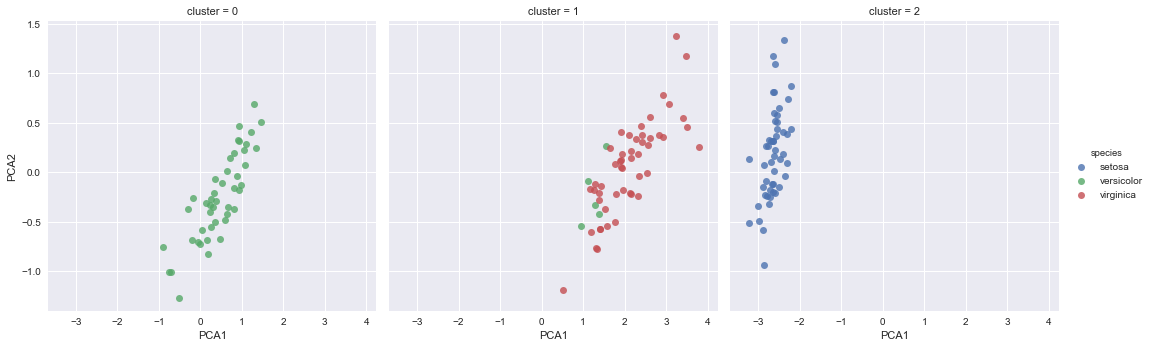

In [94]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);  #cluster跟hue的species有異曲同工之妙，恰巧區分種類

# Exploring Hand-written Digits

In [75]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape #1797組 8x8 pixels的圖片

(1797, 8, 8)

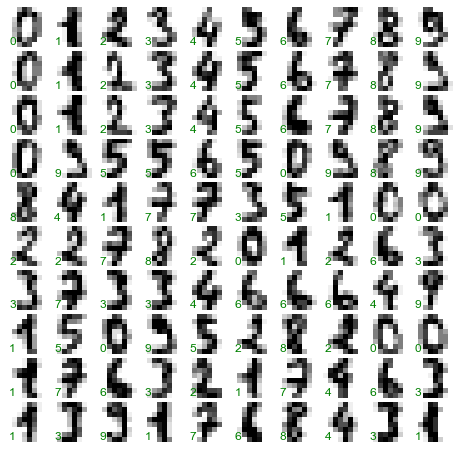

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') #灰階 cmap='binary'
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [77]:
X = digits.data
X.shape

(1797, 64)

In [78]:
y = digits.target
y.shape

(1797,)

## Unsupervised learning: Dimensionality reduction

In [79]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)  #把圖片變成2個factor
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

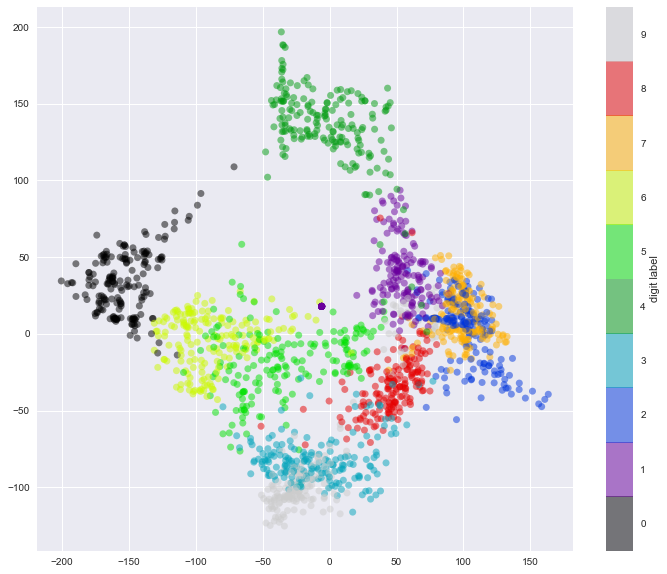

In [83]:
plt.figure(figsize=(12,10))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits: GaussianNB

In [84]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [88]:
y_model[0:5] #答案卷

array([2, 8, 2, 6, 6])

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

### Classification題：必備 confusion_matrix(ytest, y_model)

In [97]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
mat #confusion matrix本尊

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

### sns.heatmap()

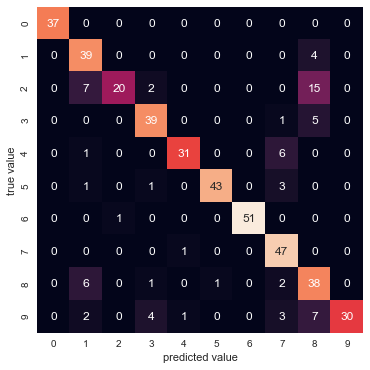

In [98]:
plt.figure(figsize=(6,6))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

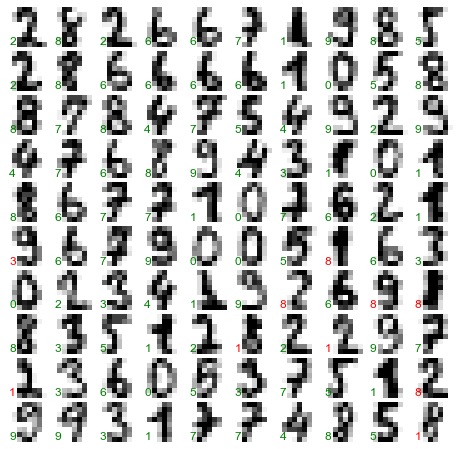

In [93]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## 結論：方法不夠好，需要更強的演算法才可以